<a href="https://colab.research.google.com/github/dipherent1/Handwriting-Calculator/blob/main/Handwriting_cal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Train model

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8843 - loss: 0.4200 - val_accuracy: 0.9590 - val_loss: 0.1369
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9671 - loss: 0.1156 - val_accuracy: 0.9716 - val_loss: 0.0966
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9781 - loss: 0.0757 - val_accuracy: 0.9731 - val_loss: 0.0877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9846 - loss: 0.0548 - val_accuracy: 0.9767 - val_loss: 0.0752
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9758 - val_loss: 0.0714
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9725 - loss: 0.0819
Test accuracy: 0.9757999777793884
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


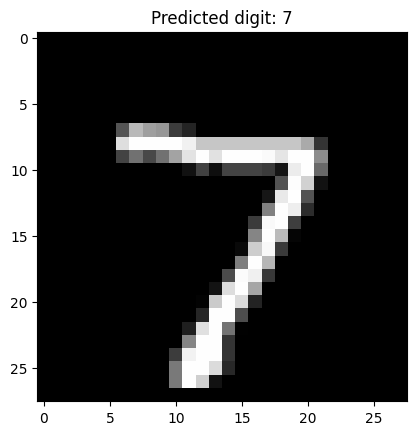

In [ ]:
# prompt: make a model that trains on human hand writing

# Install necessary libraries
!pip install tensorflow keras numpy matplotlib

# Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset (a dataset of handwritten digits)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

# Build the model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
predictions = model.predict(x_test)

# You can now use the trained model to classify new handwritten digits.
# To do this, you would need to load and preprocess the new image in the same way as the training data.
# Then you can use model.predict() to get the predicted digit.

# Example of plotting a prediction:
plt.imshow(x_test[0], cmap='gray')
plt.title('Predicted digit: {}'.format(np.argmax(predictions[0])))
plt.show()

# Save the model in the new recommended Keras format
model.save('handwriting_model.keras')



# **Just for one number**

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Recognized Digit: 4


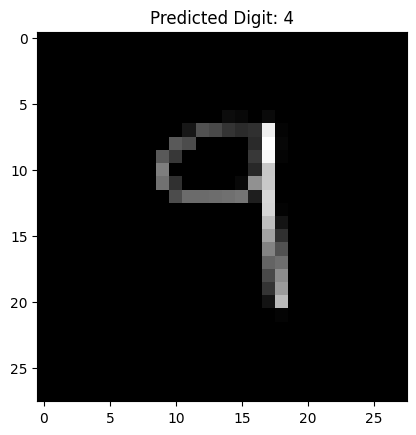

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('handwriting_model.keras')

# Load and preprocess the image
img = cv2.imread("4x5.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Try global thresholding as an alternative to adaptive thresholding
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
processed = cv2.dilate(binary, kernel, iterations=1)

# Find contours
contours, _ = cv2.findContours(processed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Check if contours were detected
if contours:
    # Find the largest contour, assuming it represents the digit
    largest_contour = max(contours, key=cv2.contourArea)

    # Get the bounding box around the largest contour
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Extract the region of interest (ROI) corresponding to the digit
    digit_roi = thresh[y:y + h, x:x + w]

    # Add padding around the ROI for better centering
    padded_digit = cv2.copyMakeBorder(digit_roi, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=0)

    # Resize the digit to 28x28 pixels, as expected by the model
    resized_digit = cv2.resize(padded_digit, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize the pixel values to the range [0, 1]
    normalized_digit = resized_digit.astype('float32') / 255.0

    # Expand dimensions to match the input shape of the model (1, 28, 28, 1)
    input_digit = np.expand_dims(normalized_digit, axis=0)
    input_digit = np.expand_dims(input_digit, axis=-1)

    # Predict the digit
    prediction = model.predict(input_digit)
    predicted_digit = np.argmax(prediction)

    # Output the recognized digit
    print("Recognized Digit:", predicted_digit)

    # Visualize the processed digit
    plt.imshow(resized_digit, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.show()
else:
    print("No contours detected.")


# **For a group of numbers**

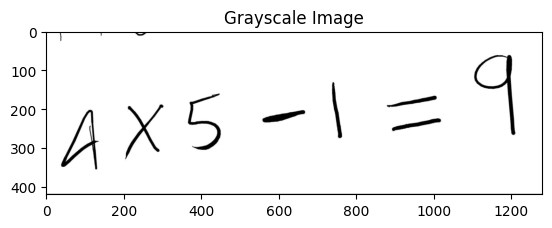

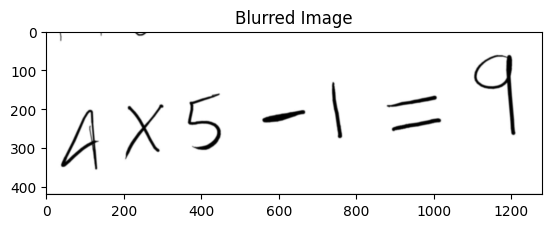

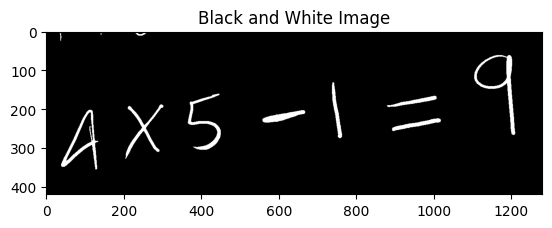

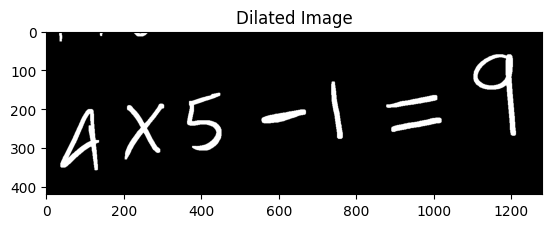

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


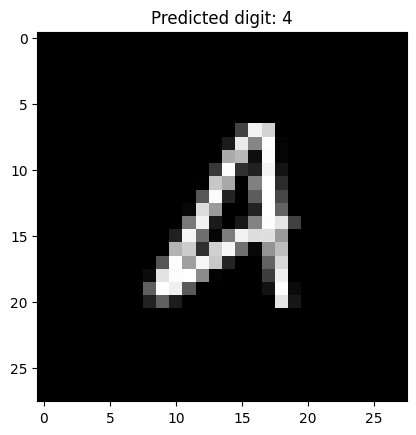

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


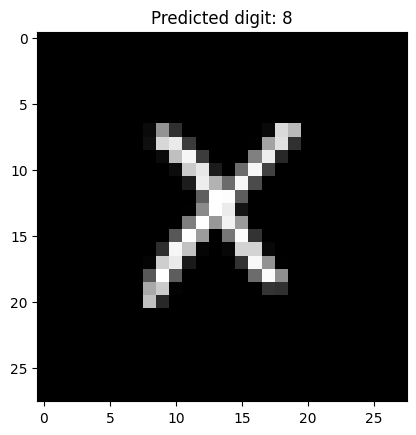

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


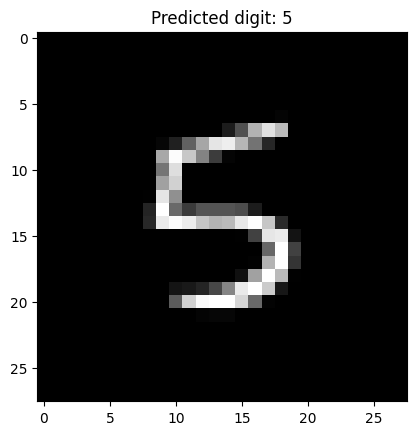

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


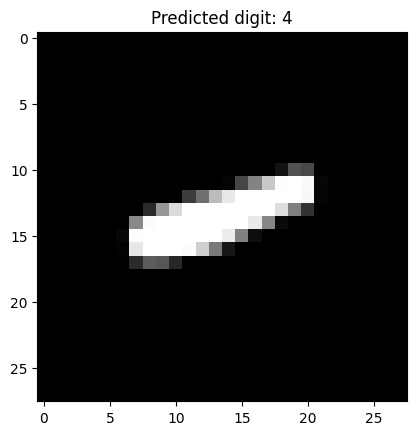

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


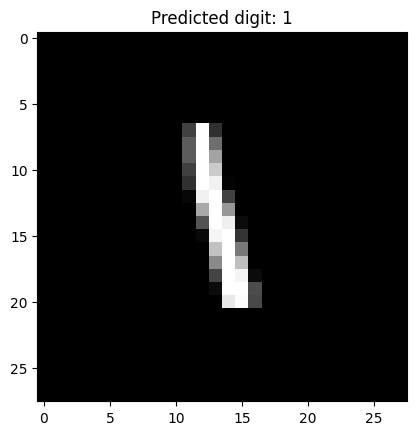

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


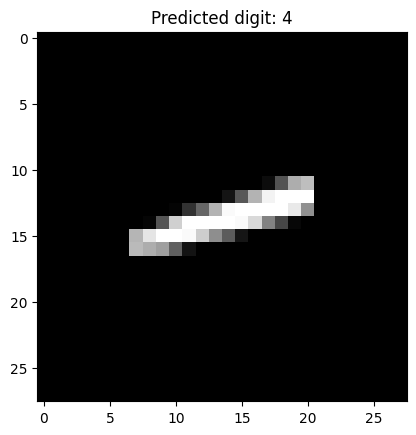

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


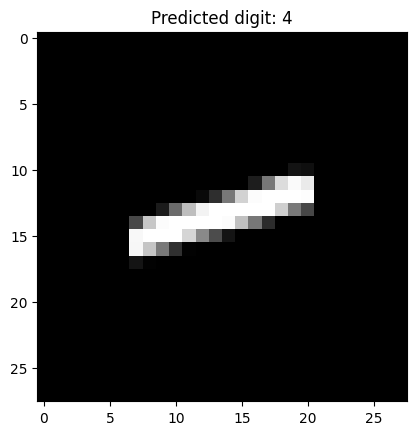

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


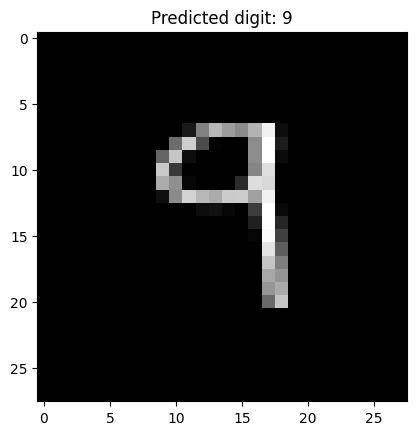

Recognized Digits: [4, 8, 5, 4, 1, 4, 4, 9]


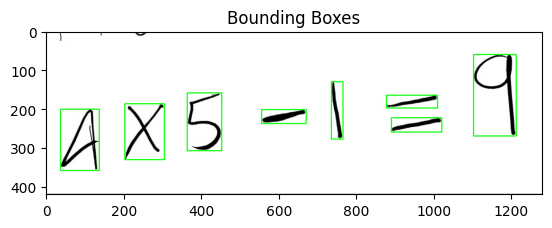

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Load the trained model
model = load_model('handwriting_model.keras')

# Load the image in grayscale (black and white)
img = cv2.imread("4x5.jpg", cv2.IMREAD_GRAYSCALE)

# Create a copy of the original image to draw bounding boxes
visualization_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)  # Convert to BGR for colored rectangles

# Show the original grayscale image
plt.imshow(img, cmap='gray')
plt.title("Grayscale Image")
plt.show()

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Show the blurred image
plt.imshow(blurred, cmap='gray')
plt.title("Blurred Image")
plt.show()

# Apply global thresholding to convert to black and white
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Show the thresholded (black and white) image
plt.imshow(binary, cmap='gray')
plt.title("Black and White Image")
plt.show()

# Apply dilation to close small gaps within digits
kernel = np.ones((5, 5), np.uint8)  # Experiment with kernel size
dilated = cv2.dilate(binary, kernel, iterations=1)

#alternative
# closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
# plt.imshow(closed, cmap='gray')
# plt.title("Closed Image")
# plt.show()


# Show the dilated image
plt.imshow(dilated, cmap='gray')
plt.title("Dilated Image")
plt.show()

# Find contours
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Sort contours by the x-coordinate to ensure left-to-right order
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

# Array to store recognized digits
recognized_digits = []

#to discard small characters
largest_area = max(cv2.contourArea(cnt) for cnt in contours)
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 0.05 * largest_area]


for cnt in contours:
    # if cv2.contourArea(cnt) < 1000:  # filter small contours
    #     continue

    # Get bounding box for the contour
    x, y, w, h = cv2.boundingRect(cnt)

    cv2.rectangle(visualization_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green box with thickness 2


    # Extract the digit region of interest
    digit_roi = dilated[y:y + h, x:x + w]

    # Add larger padding to ensure the digit is centered and not split
    # padded_digit = cv2.copyMakeBorder(digit_roi, 100, 100, 100, 100, cv2.BORDER_CONSTANT, value=0)

    pad = max(w, h) // 2  # Dynamically calculate padding
    padded_digit = cv2.copyMakeBorder(digit_roi, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)


    # Resize with aspect ratio preserved
    # # Preserve aspect ratio while resizing
    aspect_ratio = w / h
    if aspect_ratio > 1:  # Wider than tall
        new_w = 28
        new_h = int(28 / aspect_ratio)
    else:  # Taller than wide
        new_h = 28
        new_w = int(28 * aspect_ratio)

    resized_digit = cv2.resize(padded_digit, (new_w, new_h), interpolation=cv2.INTER_AREA)

    # Create a black (28, 28) canvas to center the digit
    final_digit = np.zeros((28, 28), dtype="uint8")

    # Calculate offsets to center the digit
    x_offset = (28 - new_w) // 2
    y_offset = (28 - new_h) // 2

    # Place the resized digit on the canvas
    final_digit[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_digit


    # Resize to (28, 28) for the model input
    resized_digit = cv2.resize(padded_digit, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize the pixel values
    normalized_digit = resized_digit.astype('float32') / 255.0

    # Prepare the digit for model input
    input_digit = np.expand_dims(normalized_digit, axis=0)
    input_digit = np.expand_dims(input_digit, axis=-1)

    # Predict the digit
    prediction = model.predict(input_digit)
    predicted_digit = np.argmax(prediction)
    recognized_digits.append(predicted_digit)

    # Visualize the processed digit
    plt.imshow(resized_digit, cmap='gray')
    plt.title(f"Predicted digit: {predicted_digit}")
    plt.show()

# Print the recognized digits in left-to-right order
print("Recognized Digits:", recognized_digits)

# Display the image with bounding boxes
plt.imshow(cv2.cvtColor(visualization_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for proper visualization in Matplotlib
plt.title("Bounding Boxes")
plt.show()

[2, 3, 1]


# for maths

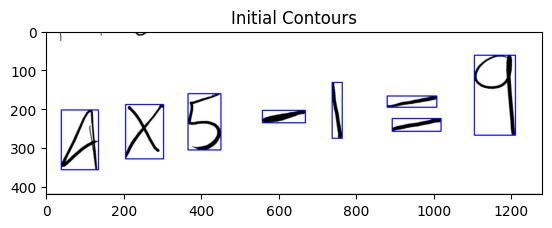

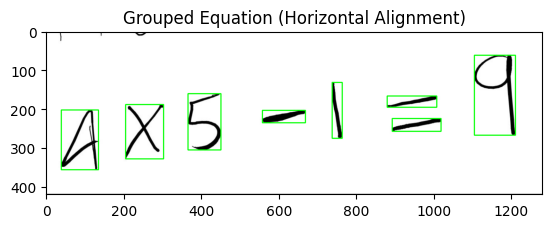

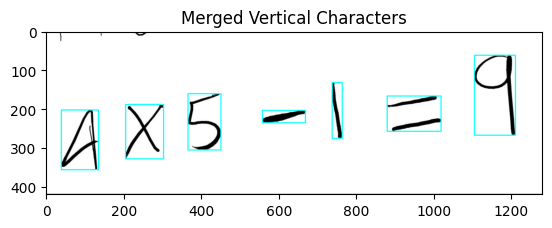

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


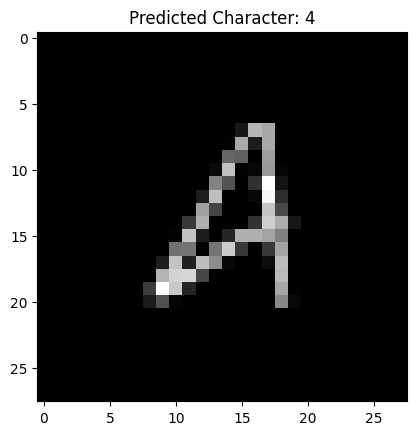

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


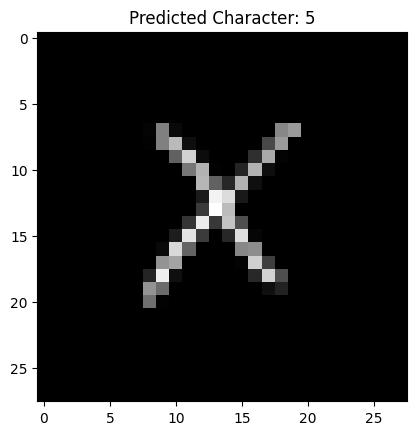

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


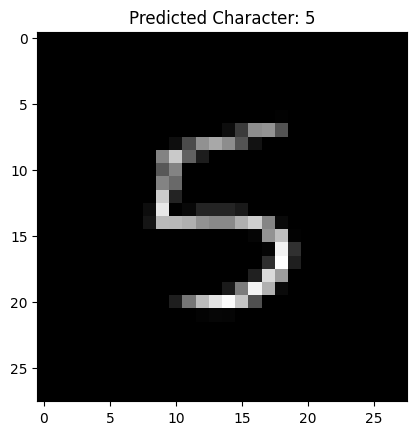

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


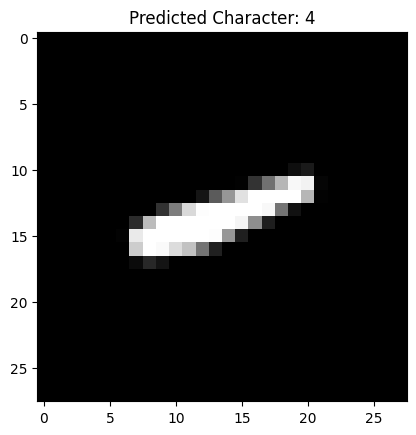

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


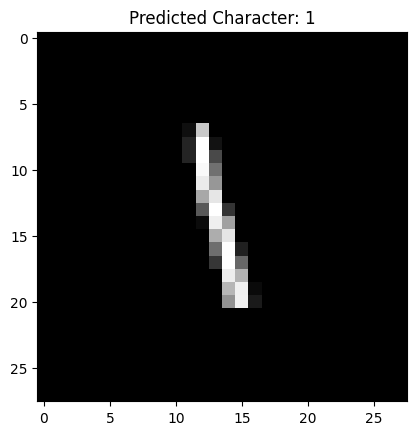

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


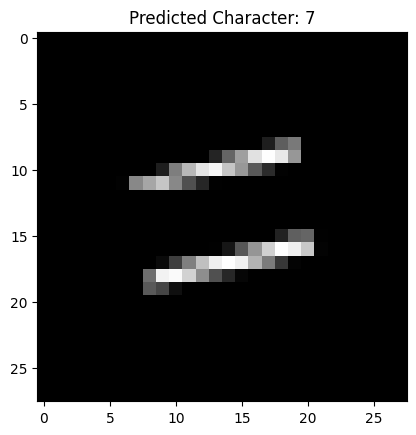

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


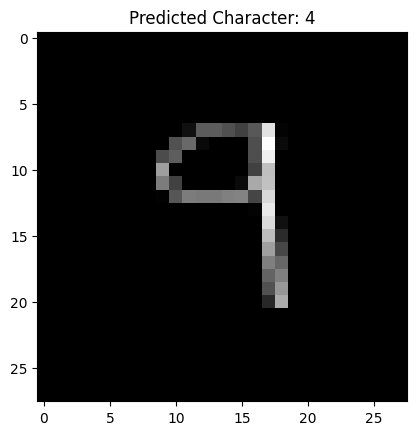

Recognized Equation: 4554174


In [3]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import random

# Load the trained model
model = load_model('handwriting_model.keras')

# Load the image in grayscale
img = cv2.imread("4x5.jpg", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(img, (5, 5), 0)

# Apply global thresholding to convert to black and white
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Apply morphological closing to close gaps
kernel = np.ones((5, 5), np.uint8)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

# Find contours
contours, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Define thresholds
vertical_tolerance = 100  # Y-coordinate alignment for vertical grouping
size_threshold = 0.05 * max(cv2.contourArea(cnt) for cnt in contours)  # Minimum size to consider
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > size_threshold]  # Filter small characters

# Sort contours by x-coordinate for left-to-right processing
contours = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

# Step 1: Visualize All Initial Contours
visualization_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(visualization_image, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Red boxes for initial contours
plt.imshow(cv2.cvtColor(visualization_image, cv2.COLOR_BGR2RGB))
plt.title("Initial Contours")
plt.show()

# Step 2: Group horizontally aligned (one equation)
equation_group = contours  # Since there's only one horizontal group (one equation)

# Visualize the grouped equation
visualization_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for cnt in equation_group:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(visualization_image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Green boxes for equation group
plt.imshow(cv2.cvtColor(visualization_image, cv2.COLOR_BGR2RGB))
plt.title("Grouped Equation (Horizontal Alignment)")
plt.show()

# Step 3: Improved Vertical Merging Logic
merged_characters = []
for cnt in equation_group:
    x, y, w, h = cv2.boundingRect(cnt)

    # Merge with existing bounding boxes if they overlap vertically
    merged = False
    for i, (mx, my, mw, mh) in enumerate(merged_characters):
        # Check if the bounding boxes overlap vertically and are horizontally close
        if abs(y - my) < vertical_tolerance and (x < mx + mw and x + w > mx):
            # Merge bounding boxes
            nx = min(mx, x)
            ny = min(my, y)
            nw = max(mx + mw, x + w) - nx
            nh = max(my + mh, y + h) - ny
            merged_characters[i] = (nx, ny, nw, nh)
            merged = True
            break

    if not merged:
        merged_characters.append((x, y, w, h))

# Visualize the merged vertical characters
visualization_image = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
for x, y, w, h in merged_characters:
    cv2.rectangle(visualization_image, (x, y), (x + w, y + h), (255, 255, 0), 2)  # Yellow boxes for merged characters
plt.imshow(cv2.cvtColor(visualization_image, cv2.COLOR_BGR2RGB))
plt.title("Merged Vertical Characters")
plt.show()
# Step 4: Process each character and recognize
recognized_digits = []
for x, y, w, h in merged_characters:
    # Extract the character region
    char_roi = closed[y:y + h, x:x + w]

    # Add padding
    pad = max(w, h) // 2
    padded_char = cv2.copyMakeBorder(char_roi, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=0)

    # Resize to (28, 28) for the model input
    resized_char = cv2.resize(padded_char, (28, 28), interpolation=cv2.INTER_AREA)

    # Normalize the pixel values
    normalized_char = resized_char.astype('float32') / 255.0

    # Prepare the character for model input
    input_char = np.expand_dims(normalized_char, axis=0)
    input_char = np.expand_dims(input_char, axis=-1)

    # Predict the character
    prediction = model.predict(input_char)
    predicted_digit = np.argmax(prediction)
    recognized_digits.append(predicted_digit)

    # Visualize the processed character
    plt.imshow(resized_char, cmap='gray')
    plt.title(f"Predicted Character: {predicted_digit}")
    plt.show()

# Final Output: Recognized Equation
print("Recognized Equation:", ''.join(map(str, recognized_digits)))


In [ ]:
!pip install pytesseract

# **Using pytesseract **

In [ ]:
import pytesseract
import cv2

img = cv2.imread('numbers-refined.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
text = pytesseract.image_to_string(gray, config='--psm 8')
print("Recognized text:", text)


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.